In [3]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

C:\Users\ealik\AppData\Local\Temp\ipykernel_1320\1311226446.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [27]:
url = 'https://krisha.kz/prodazha/kvartiry/astana/'

In [32]:
result = []
for i in range(1, 101):
    response_all_page = requests.get(f'{url}?page={i}')
    soup = BeautifulSoup(response_all_page.text, 'html')
    links = soup.find_all('div', class_ = 'a-card__header-left')

    for link in links:
        result.append({'links' : 'https://krisha.kz/'+str(link.find('a', class_='a-card__title').get('href'))})

In [33]:
final = pd.DataFrame(columns=['Ссылка', 'Цена', 'Количество комнат', 'Тип дома', 'Год постройки', 'Этаж', 
                            'Этажность', 'Площадь, м2', 'Балкон', 'Санузел', 'Потолки',
                            'Квартира мебелирована','Состояние квартиры','Район'])
for item in result:
    response_all_page_open = requests.get(item.get('links'))
    soup_all_page_open = BeautifulSoup(response_all_page_open.text, 'html')
    
    df=pd.DataFrame(columns=['Ссылка', 'Цена', 'Количество комнат', 'Тип дома', 'Год постройки', 'Этаж', 
                                'Этажность', 'Площадь, м2', 'Балкон', 'Санузел', 'Потолки',
                                'Квартира мебелирована','Состояние квартиры','Район'])
    
    df.loc[0]=None
    df.iloc[0,0]= item.get('links')
    
    try:
        df.iloc[0,1] = soup_all_page_open.find(class_='offer__price').text.strip().replace("от","").replace("〒","")
    except:
        pass
    
    try:
        df.iloc[0,2] = int(re.sub('\D', '', re.search(r'^([^,]*),(.*)$', soup_all_page_open.find('div', class_='offer__advert-title').find('h1').text.strip()).group(1)))
    except:
        pass

    try:
        df.iloc[0,3] = soup_all_page_open.find('div', class_='offer__info-item', attrs={'data-name': 'flat.building'}).find('div',class_='offer__advert-short-info').text.strip()
    except:
        pass  

    try:
        df.iloc[0,4] = int(soup_all_page_open.find('div', class_='offer__info-item', attrs={'data-name': 'house.year'}).find('div',class_='offer__advert-short-info').text.strip())
    except:
        pass 
        
    try:
        df.iloc[0,5] = int(soup_all_page_open.find('div', class_='offer__info-item', attrs={'data-name': 'flat.floor'}).find('div',class_='offer__advert-short-info').text.strip()[0])
    except:
        pass

    try:
        df.iloc[0,6] = int(soup_all_page_open.find('div', class_='offer__info-item', attrs={'data-name': 'flat.floor'}).find('div',class_='offer__advert-short-info').text.strip()[-2:])
    except:
        pass

    try:
        df.iloc[0,7] = soup_all_page_open.find('div', class_='offer__info-item', attrs={'data-name': 'live.square'}).find('div',class_='offer__advert-short-info').text.strip().split()[0]
    except:
        pass

    if pd.isna(df.iloc[0,8]):
        try:
            df.iloc[0,8]=soup_all_page_open.find('div', class_='offer__parameters').find('dt', attrs={'data-name': 'flat.balcony'}).find_next_sibling('dd').text      
        except:
            pass

    try:
        df.iloc[0,9] = soup_all_page_open.find('div', class_='offer__info-item', attrs={'data-name': 'flat.toilet'}).find('div',class_='offer__advert-short-info').text.strip()
    except:
        pass
  
    if pd.isna(df.iloc[0,10]):
        try:
            df.iloc[0,10] = soup_all_page_open.find('div', class_='offer__parameters').find('dt', attrs={'data-name': 'ceiling'}).find_next_sibling('dd').text.split()[0]    
        except:
            pass

    if pd.isna(df.iloc[0,11]):
        try:
            df.iloc[0,11]=soup_all_page_open.find('div', class_='offer__parameters').find('dt', attrs={'data-name': 'flat.furniture'}).find_next_sibling('dd').text      
        except:
            pass
            
    try:
        df.iloc[0,12] = soup_all_page_open.find('div', class_='offer__info-item', attrs={'data-name': 'flat.renovation'}).find('div',class_='offer__advert-short-info').text.strip()
    except:
        pass

    try:
        df.iloc[0,13] = soup_all_page_open.find('div', class_='offer__location offer__advert-short-info').find('span').text.strip().split(",")[1]
    except:
        pass
        
    df['Цена'] = df['Цена'].str.replace(u'\xa0','').astype (float)
    df['Площадь, м2'] = df['Площадь, м2'].astype (float)
    df['Потолки'] = df['Потолки'].astype (float)
    
    final = pd.concat([final, df], ignore_index=True)

<>:21: SyntaxWarning: invalid escape sequence '\D'
<>:21: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ealik\AppData\Local\Temp\ipykernel_1984\606100672.py:21: SyntaxWarning: invalid escape sequence '\D'
  df.iloc[0,2] = int(re.sub('\D', '', re.search(r'^([^,]*),(.*)$', soup_all_page_open.find('div', class_='offer__advert-title').find('h1').text.strip()).group(1)))
C:\Users\ealik\AppData\Local\Temp\ipykernel_1984\606100672.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'https://krisha.kz//a/show/692312456' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[0,0]= item.get('links')
C:\Users\ealik\AppData\Local\Temp\ipykernel_1984\606100672.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32 300 000 ' has dtype incompatible with float64, please explicitly cast t

In [34]:
final

Ссылка        Цена  Количество комнат  \
0     https://krisha.kz//a/show/692312456  32300000.0                2.0   
1     https://krisha.kz//a/show/692564996  13750000.0                1.0   
2     https://krisha.kz//a/show/691344565  52999999.0                4.0   
3     https://krisha.kz//a/show/692568765  78000000.0                4.0   
4     https://krisha.kz//a/show/692570601  32500000.0                2.0   
...                                   ...         ...                ...   
1998  https://krisha.kz//a/show/665051106  19950000.0                2.0   
1999  https://krisha.kz//a/show/692610844  21500000.0                1.0   
2000  https://krisha.kz//a/show/678559605  26000000.0                2.0   
2001  https://krisha.kz//a/show/692447912  22300000.0                1.0   
2002  https://krisha.kz//a/show/692304716  23300000.0                2.0   

        Тип дома  Год постройки  Этаж  Этажность  Площадь, м2  \
0            NaN         2020.0   1.0       20.0         60.0   
1      кирпичный         2020.0   9.0       10.0         38.0   
2     монолитный         2006.0   5.0       10.0        145.0   
3     монолитный         2016.0   1.0       34.0        127.4   
4     монолитный         2023.0   4.0       17.0         47.4   
...          ...            ...   ...        ...          ...   
1998   кирпичный         2016.0   4.0        5.0         42.0   
1999   панельный         2018.0   4.0        9.0         37.0   
2000  монолитный         2020.0   2.0        7.0         50.0   
2001   кирпичный         2023.0   9.0       12.0         40.0   
2002  монолитный         2023.0   1.0       18.0         44.0   

                             Балкон        Санузел  Потолки  \
0                               NaN            NaN      NaN   
1                               NaN            NaN      NaN   
2                   балкон и лоджия  2 с/у и более      3.0   
3                               NaN            NaN      2.7   
4                               NaN    совмещенный      3.0   
...                             ...            ...      ...   
1998  несколько балконов или лоджий     раздельный      2.7   
1999                            NaN            NaN      NaN   
2000                         балкон            NaN      NaN   
2001                         лоджия            NaN      3.0   
2002                         лоджия            NaN      3.0   

     Квартира мебелирована Состояние квартиры           Район  
0                      NaN                NaN   Есильский р-н  
1                      NaN            хорошее      Алматы р-н  
2                      NaN                NaN   Есильский р-н  
3                      NaN                NaN      Алматы р-н  
4                      NaN                NaN   Есильский р-н  
...                    ...                ...             ...  
1998                   NaN            хорошее   Есильский р-н  
1999                   NaN                NaN   Есильский р-н  
2000                   NaN            хорошее      Алматы р-н  
2001                   NaN            хорошее   Есильский р-н  
2002                   NaN            хорошее        Нура р-н  

[2003 rows x 14 columns]

In [35]:
final.to_csv('Krisha.csv', index=False)

In [4]:
krisha = pd.read_csv('./Krisha.csv')
krisha.head()

Ссылка        Цена  Количество комнат  \
0  https://krisha.kz//a/show/692312456  32300000.0                2.0   
1  https://krisha.kz//a/show/692564996  13750000.0                1.0   
2  https://krisha.kz//a/show/691344565  52999999.0                4.0   
3  https://krisha.kz//a/show/692568765  78000000.0                4.0   
4  https://krisha.kz//a/show/692570601  32500000.0                2.0   

     Тип дома  Год постройки  Этаж  Этажность  Площадь, м2           Балкон  \
0         NaN         2020.0   1.0       20.0         60.0              NaN   
1   кирпичный         2020.0   9.0       10.0         38.0              NaN   
2  монолитный         2006.0   5.0       10.0        145.0  балкон и лоджия   
3  монолитный         2016.0   1.0       34.0        127.4              NaN   
4  монолитный         2023.0   4.0       17.0         47.4              NaN   

         Санузел  Потолки  Квартира мебелирована Состояние квартиры  \
0            NaN      NaN                    NaN                NaN   
1            NaN      NaN                    NaN            хорошее   
2  2 с/у и более      3.0                    NaN                NaN   
3            NaN      2.7                    NaN                NaN   
4    совмещенный      3.0                    NaN                NaN   

            Район  
0   Есильский р-н  
1      Алматы р-н  
2   Есильский р-н  
3      Алматы р-н  
4   Есильский р-н

In [5]:
krisha.info()
krisha.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ссылка                 2003 non-null   object 
 1   Цена                   2003 non-null   float64
 2   Количество комнат      2003 non-null   float64
 3   Тип дома               1910 non-null   object 
 4   Год постройки          2003 non-null   float64
 5   Этаж                   1236 non-null   float64
 6   Этажность              1236 non-null   float64
 7   Площадь, м2            2003 non-null   float64
 8   Балкон                 733 non-null    object 
 9   Санузел                1081 non-null   object 
 10  Потолки                1042 non-null   float64
 11  Квартира мебелирована  0 non-null      float64
 12  Состояние квартиры     900 non-null    object 
 13  Район                  1934 non-null   object 
dtypes: float64(8), object(6)
memory usage: 219.2+ KB


Ссылка                      0
Цена                        0
Количество комнат           0
Тип дома                   93
Год постройки               0
Этаж                      767
Этажность                 767
Площадь, м2                 0
Балкон                   1270
Санузел                   922
Потолки                   961
Квартира мебелирована    2003
Состояние квартиры       1103
Район                      69
dtype: int64

In [6]:
krisha[['Этаж', 'Этажность']] = krisha[['Этаж', 'Этажность']]. fillna(krisha[['Этаж', 'Этажность']].mean())

In [7]:
krisha = krisha.drop(columns=['Ссылка', 'Балкон', 'Квартира мебелирована', 'Состояние квартиры', 'Потолки'])

In [8]:
krisha.corr(numeric_only=True).style.background_gradient(cmap='coolwarm').format(precision=2)

In [9]:
print(krisha['Тип дома'].value_counts())
print(krisha['Санузел'].value_counts())
print(krisha['Район'].value_counts())

Тип дома
монолитный    1198
кирпичный      641
панельный       58
иное            13
Name: count, dtype: int64
Санузел
совмещенный      596
2 с/у и более    345
раздельный       140
Name: count, dtype: int64
Район
Есильский р-н    804
Алматы р-н       506
Нура р-н         385
Сарыарка р-н     168
р-н Байконур      71
Name: count, dtype: int64


In [10]:
krisha['Тип дома'] = krisha['Тип дома'].fillna('монолитный')
krisha['Санузел'] = krisha['Санузел'].fillna('совмещенный')
krisha['Район'] = krisha['Район'].fillna(' Есильский р-н')

In [11]:
value_counts = krisha['Район'].value_counts()

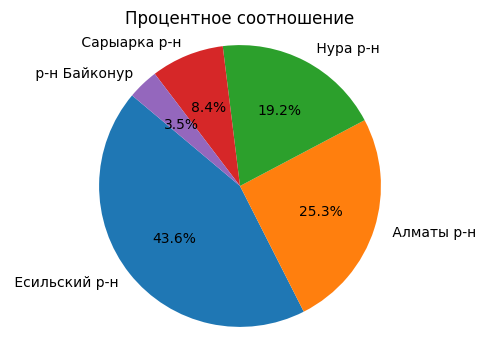

In [13]:
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Чтобы диаграмма была кругом
plt.title('Процентное соотношение')
plt.show()

In [15]:
average_prices = krisha.groupby('Район')['Цена'].mean()

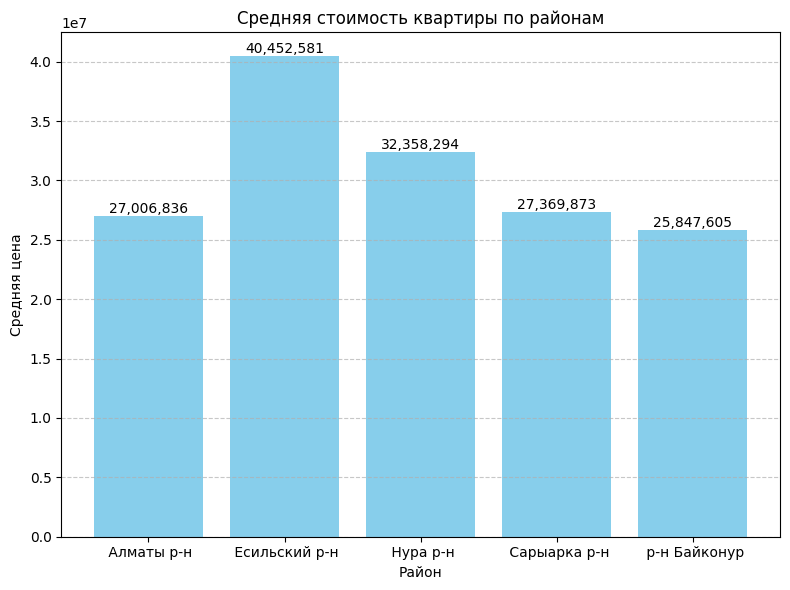

In [16]:
plt.figure(figsize=(8, 6))
bars = plt.bar(average_prices.index, average_prices, color='skyblue')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{int(bar.get_height()):,}', ha='center', va='bottom', fontsize=10)

plt.title('Средняя стоимость квартиры по районам')
plt.xlabel('Район')
plt.ylabel('Средняя цена')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
krisha.isna().sum()

Цена                 0
Количество комнат    0
Тип дома             0
Год постройки        0
Этаж                 0
Этажность            0
Площадь, м2          0
Санузел              0
Район                0
dtype: int64

In [18]:
krisha

Цена  Количество комнат    Тип дома  Год постройки  Этаж  \
0     32300000.0                2.0  монолитный         2020.0   1.0   
1     13750000.0                1.0   кирпичный         2020.0   9.0   
2     52999999.0                4.0  монолитный         2006.0   5.0   
3     78000000.0                4.0  монолитный         2016.0   1.0   
4     32500000.0                2.0  монолитный         2023.0   4.0   
...          ...                ...         ...            ...   ...   
1998  19950000.0                2.0   кирпичный         2016.0   4.0   
1999  21500000.0                1.0   панельный         2018.0   4.0   
2000  26000000.0                2.0  монолитный         2020.0   2.0   
2001  22300000.0                1.0   кирпичный         2023.0   9.0   
2002  23300000.0                2.0  монолитный         2023.0   1.0   

      Этажность  Площадь, м2        Санузел           Район  
0          20.0         60.0    совмещенный   Есильский р-н  
1          10.0         38.0    совмещенный      Алматы р-н  
2          10.0        145.0  2 с/у и более   Есильский р-н  
3          34.0        127.4    совмещенный      Алматы р-н  
4          17.0         47.4    совмещенный   Есильский р-н  
...         ...          ...            ...             ...  
1998        5.0         42.0     раздельный   Есильский р-н  
1999        9.0         37.0    совмещенный   Есильский р-н  
2000        7.0         50.0    совмещенный      Алматы р-н  
2001       12.0         40.0    совмещенный   Есильский р-н  
2002       18.0         44.0    совмещенный        Нура р-н  

[2003 rows x 9 columns]

In [19]:
cat_cols = [
    'Тип дома',
    'Санузел',
    'Район'
]
krisha = pd.get_dummies(krisha, columns=cat_cols, dtype=np.uint8)

In [20]:
krisha.columns

Index(['Цена', 'Количество комнат', 'Год постройки', 'Этаж', 'Этажность',
       'Площадь, м2', 'Тип дома_иное', 'Тип дома_кирпичный',
       'Тип дома_монолитный', 'Тип дома_панельный', 'Санузел_2 с/у и более',
       'Санузел_раздельный', 'Санузел_совмещенный', 'Район_ Алматы р-н',
       'Район_ Есильский р-н', 'Район_ Нура р-н', 'Район_ Сарыарка р-н',
       'Район_ р-н Байконур'],
      dtype='object')

In [21]:
krisha.corr(numeric_only=True).style.background_gradient(cmap='coolwarm').format(precision=2)

In [22]:
krisha.describe()

Цена  Количество комнат  Год постройки         Этаж  \
count  2.003000e+03        2003.000000    2003.000000  2003.000000   
mean   3.388508e+07           2.121318    2018.287569     4.193366   
std    2.468895e+07           0.951239       9.674016     2.123648   
min    5.200000e+06           1.000000    1961.000000     1.000000   
25%    1.999450e+07           1.000000    2017.000000     3.000000   
50%    2.700000e+07           2.000000    2022.000000     4.193366   
75%    3.965350e+07           3.000000    2024.000000     5.000000   
max    2.600000e+08           7.000000    2025.000000     9.000000   

         Этажность  Площадь, м2  Тип дома_иное  Тип дома_кирпичный  \
count  2003.000000  2003.000000     2003.00000          2003.00000   
mean     11.550971    67.895741        0.00649             0.32002   
std       4.046914    33.508165        0.08032             0.46660   
min       2.000000    13.000000        0.00000             0.00000   
25%       9.000000    43.000000        0.00000             0.00000   
50%      11.550971    60.000000        0.00000             0.00000   
75%      12.000000    84.000000        0.00000             1.00000   
max      43.000000   417.000000        1.00000             1.00000   

       Тип дома_монолитный  Тип дома_панельный  Санузел_2 с/у и более  \
count          2003.000000         2003.000000            2003.000000   
mean              0.644533            0.028957               0.172242   
std               0.478774            0.167726               0.377685   
min               0.000000            0.000000               0.000000   
25%               0.000000            0.000000               0.000000   
50%               1.000000            0.000000               0.000000   
75%               1.000000            0.000000               0.000000   
max               1.000000            1.000000               1.000000   

       Санузел_раздельный  Санузел_совмещенный  Район_ Алматы р-н  \
count         2003.000000          2003.000000        2003.000000   
mean             0.069895             0.757863           0.252621   
std              0.255034             0.428484           0.434624   
min              0.000000             0.000000           0.000000   
25%              0.000000             1.000000           0.000000   
50%              0.000000             1.000000           0.000000   
75%              0.000000             1.000000           1.000000   
max              1.000000             1.000000           1.000000   

       Район_ Есильский р-н  Район_ Нура р-н  Район_ Сарыарка р-н  \
count           2003.000000      2003.000000          2003.000000   
mean               0.435846         0.192212             0.083874   
std                0.495991         0.394137             0.277268   
min                0.000000         0.000000             0.000000   
25%                0.000000         0.000000             0.000000   
50%                0.000000         0.000000             0.000000   
75%                1.000000         0.000000             0.000000   
max                1.000000         1.000000             1.000000   

       Район_ р-н Байконур  
count          2003.000000  
mean              0.035447  
std               0.184953  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               0.000000  
max               1.000000

In [23]:
X = krisha[['Количество комнат', 'Площадь, м2', 'Тип дома_монолитный', 'Санузел_2 с/у и более', 'Санузел_совмещенный', 'Район_ Есильский р-н']]
X

Количество комнат  Площадь, м2  Тип дома_монолитный  \
0                   2.0         60.0                    1   
1                   1.0         38.0                    0   
2                   4.0        145.0                    1   
3                   4.0        127.4                    1   
4                   2.0         47.4                    1   
...                 ...          ...                  ...   
1998                2.0         42.0                    0   
1999                1.0         37.0                    0   
2000                2.0         50.0                    1   
2001                1.0         40.0                    0   
2002                2.0         44.0                    1   

      Санузел_2 с/у и более  Санузел_совмещенный  Район_ Есильский р-н  
0                         0                    1                     1  
1                         0                    1                     0  
2                         1                    0                     1  
3                         0                    1                     0  
4                         0                    1                     1  
...                     ...                  ...                   ...  
1998                      0                    0                     1  
1999                      0                    1                     1  
2000                      0                    1                     0  
2001                      0                    1                     1  
2002                      0                    1                     0  

[2003 rows x 6 columns]

In [24]:
y = krisha.loc[:, 'Цена']
y

0       32300000.0
1       13750000.0
2       52999999.0
3       78000000.0
4       32500000.0
           ...    
1998    19950000.0
1999    21500000.0
2000    26000000.0
2001    22300000.0
2002    23300000.0
Name: Цена, Length: 2003, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train, y_train) 

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
mse_2 = mean_squared_error(y_test, y_pred)
mae_2 = mean_absolute_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

In [32]:
print("MSE --> ", mse_2)
print("MAE --> ", mae_2)
print("R2 --> ", r2_2)

MSE -->  190826034893433.16
MAE -->  7675243.648586916
R2 -->  0.7544943821029131


In [33]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
dt.score(X_train, y_train)

0.9883298073388019

In [35]:
dt.score(X_test, y_test)

0.7000049249375735

In [36]:
from sklearn.model_selection import GridSearchCV 
parameters = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

In [37]:
dt2 = DecisionTreeRegressor()
dt2 = GridSearchCV(dt2, parameters)

In [38]:
dt2.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15]})

In [39]:
y_pred = dt2.predict(X_test)

In [40]:
print("training data score: " + str(dt2.score(X_train, y_train)))
print('test data score ' + str(dt2.score(X_test, y_test)))

training data score: 0.8033523289763962
test data score 0.7473565249714531


In [41]:
dt2.best_params_

{'max_depth': 4, 'max_leaf_nodes': 15}